In [ ]:
'''
#python atmosphere comes with installed libraries.
for example like:
                 train test split, sns,numpy and pandas etc
first we have imported all the necessary libraries that we used in this code.
then we read our dataset of atack files.then we plot some graphs like ,histogram and countplot.
then we get the shape of the data nd removed some of the columns just to improving the accuracy.
afterthat we counted all the null values and get the shape.
then we removed the space from the columns.
afterthat we filled nan values with 0 and done labelling here.
In feature engineering we have selected some of the features and drop them that is taken for the prediction.
then we have applied fcmim technique and showed some of the imported features.
afterthat we used pca technique.
the models we have used in this code i.e extra tree classifier and xgboost with cross validation.
By applying these models we have got thr accuracy that is mentioned in our paper.
then we also find out the accuracy,precision ,recall,f1_score for each model.
as mentioned in our base paper.
the data we have used in this model which is publicly available.
we have used training and testing data in this code.
and then we have done data visualization by showing some of the graph's like hist and count plots
after visualization we have applied labeling,fcmim,and pca techniques.
we have also done feaure selection here
we have used only few columns to create principal component analysis(pca). 

'''

"\n#python atmosphere comes with installed libraries.\nfor example like:\n                 train test split, sns,numpy and pandas etc\nfirst we have imported all the necessary libraries that we used in this code.\nthen we read our dataset of atack files.then we plot some graphs like ,histogram and countplot.\nthen we get the shape of the data nd removed some of the columns just to improving the accuracy.\nafterthat we counted all the null values and get the shape.\nthen we removed the space from the columns.\nafterthat we filled nan values with 0 and done labelling here.\nIn feature engineering we have selected some of the features and drop them that is taken for the prediction.\nthen we have applied fcmim technique and showed some of the imported features.\nafterthat we used pca technique.\nthe models we have used in this code i.e extra tree classifier and xgboost with cross validation.\nBy applying these models we have got thr accuracy that is mentioned in our paper.\nthen we also fi

In [2]:
#Importing the necessary libraries in the code.
import numpy as np
#Numpy is imported here so that we may work with arrays.
import pandas as pd
#we are currently importing pandas to manipulate da_ta.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split_data
#For data splitting in taining and tsting, import taintstsplt().
from sklearn import metrics as mtrx
import matplotlib.pyplot as matplt
import seaborn as sns
#Currently, we are importing Seaborn and Matplotlib for da_ta visualisation.

In [4]:
!pip install skfeature-chappers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 KB 2.3 MB/s eta 0:00:00


In [5]:
from sklearn.preprocessing import StandardScaler as STNSCA
#For data normalisation, stndrd scaler are loaded from sklrn.
from sklearn.ensemble import BaggingClassifier as BGCLF
# importing sklearn's bagging classifier
from skfeature.function.information_theoretical_based import CMIM
import warnings
#Currently, we are impo_rti_ng alerts for fil_ter_ing ignore
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Here, we are importing reports for the accuracy, recall, and F1 scores.
from sklearn.metrics import classification_report, accuracy_score,plot_confusion_matrix,precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score,plot_roc_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#importing some models For classification 
from sklearn.tree import DecisionTreeClassifier
#DT model are imported from sklearn

In [8]:
#use the pandas library for reading dataset
web_attack_data=pd.read_csv("/content/drive/MyDrive/FULLCODE/attack_file.csv")

In [ ]:
#remove first space from column values
#removing spaces from aceept char
web_attack_data['accept_char']=web_attack_data['accept_char'].str.strip()
#removing spaces from accept_lang
web_attack_data['accept_lang']=web_attack_data['accept_lang'].str.strip()
#removing spaces from accept_encoding
web_attack_data['accept_encoding']=web_attack_data['accept_encoding'].str.strip()
#removing spaces from user_agent
web_attack_data['user_agent']=web_attack_data['user_agent'].str.strip()
#removing spaces from  cache_control
web_attack_data['cache_control']=web_attack_data['cache_control'].str.strip()
#removing spaces from connection
web_attack_data['connection']=web_attack_data['connection'].str.strip()
#removing spaces from nombre
web_attack_data['nombre']=web_attack_data['nombre'].str.strip()
#removing spaces from login
web_attack_data['login']=web_attack_data['login'].str.strip()
#removing spaces from password
web_attack_data['password']=web_attack_data['password'].str.strip()
#removing spaces from user_agent
web_attack_data['user_agent']=web_attack_data['user_agent'].str.strip()
#removing spaces from pragma
web_attack_data['pragma']=web_attack_data['pragma'].str.strip()
#removing spaces from content_type
web_attack_data['content_type']=web_attack_data['content_type'].str.strip()
#removing spaces from aceept char cookie
web_attack_data['cookie']=web_attack_data['cookie'].str.strip()
#first fie rows are showing by head function
web_attack_data.head(1)

,Length_of_cookie,accept,accept_char,accept_encoding,accept_lang,cache_control,connection,content_length,content_type,cookie,...,login,method,nombre,password,password_length,pragma,special_chars,user_agent,user_agent_length,label
0,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,NaN,NaN,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,NaN,GET,NaN,NaN,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1


In [ ]:
##_get the shape of our data
web_attack_data.shape

(169065, 24)

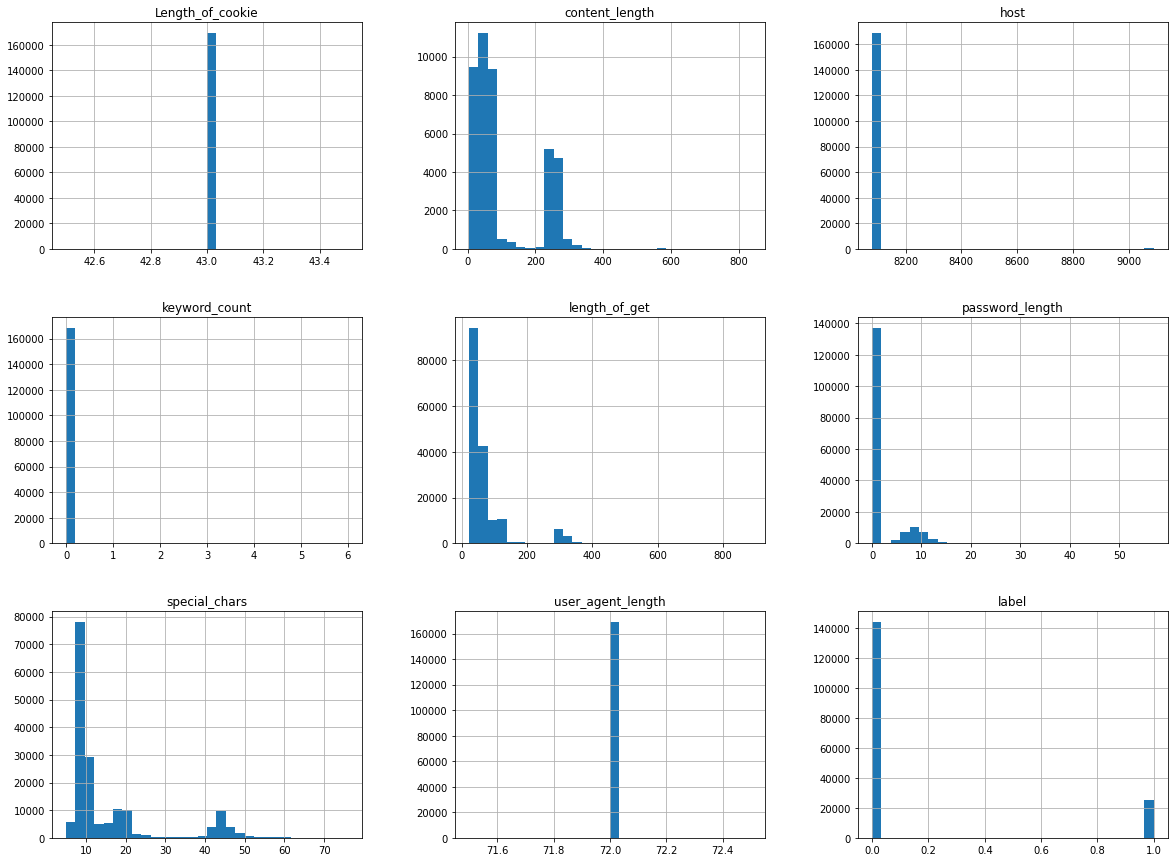

In [ ]:
# define parameter for all the histograms
web_attack_data.hist(bins=30, figsize=(20,15));

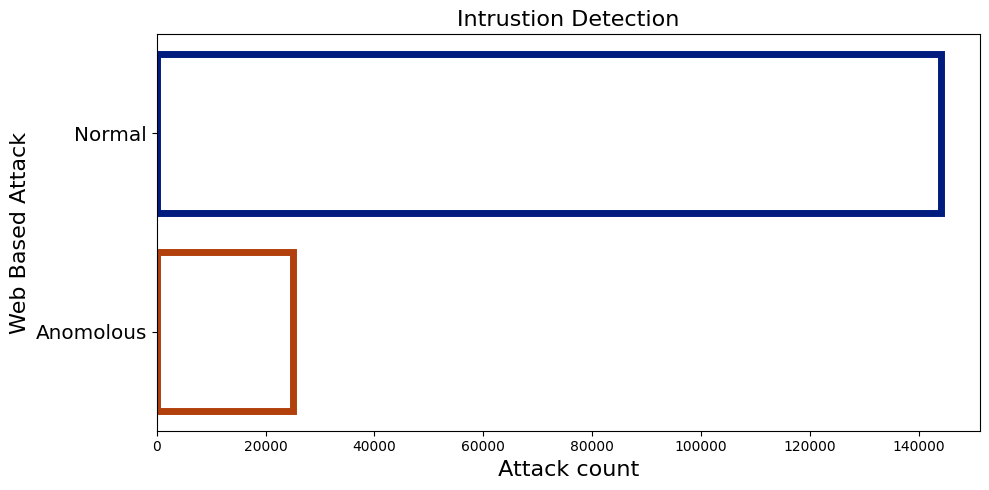

In [ ]:
#a count plot to show number of labels
matplt.figure(figsize=(10,5),dpi=100)
#fig_size
cplot=sns.countplot(y='label',data=web_attack_data,facecolor=(0, 0, 0, 0),linewidth=5,palette='Set3',edgecolor=sns.color_palette("dark", 2))
# web-based attack countplot with attack count and colour correction
matplt.xlabel(' Attack count ',fontsize=16)

##adjusting the x axis label attack count and the font size to 16
matplt.ylabel('Web Based Attack',fontsize=16)
# fixing label on y axis web based attack count and font size 16
labels=['Normal','Anomolous']#Here are two labels that are normal and anamolous.
cplot.set_yticklabels(labels,rotation=0,fontsize='x-large')
matplt.title("Intrustion Detection",fontsize=16)
#Intrusion detection gicing title 
matplt.tight_layout()

In [ ]:
#fill nan with 0
web_attack_data['email']=web_attack_data['email'].fillna('0')
web_attack_data['login']=web_attack_data['login'].fillna('0')
web_attack_data['password']=web_attack_data['password'].fillna('0')
web_attack_data['nombre']=web_attack_data['nombre'].fillna('0')
web_attack_data['content_length']=web_attack_data['content_length'].fillna(0)
web_attack_data['content_type']=web_attack_data['content_type'].fillna('0')                                  
web_attack_data.head(1)

,Length_of_cookie,accept,accept_char,accept_encoding,accept_lang,cache_control,connection,content_length,content_type,cookie,...,login,method,nombre,password,password_length,pragma,special_chars,user_agent,user_agent_length,label
0,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,0.0,0,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,0,GET,0,0,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1


**Labeling **

In [ ]:
# The object label encoder is capable of comprehending wrd labls.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in columns
web_attack_data['accept']= label_encoder.fit_transform(web_attack_data['accept'])
web_attack_data['method']= label_encoder.fit_transform(web_attack_data['method'])
web_attack_data['cookie']= label_encoder.fit_transform(web_attack_data['cookie'])
web_attack_data['email']= label_encoder.fit_transform(web_attack_data['email'])
web_attack_data['host']= label_encoder.fit_transform(web_attack_data['host'])
web_attack_data['login']= label_encoder.fit_transform(web_attack_data['login'])
web_attack_data['password']= label_encoder.fit_transform(web_attack_data['password'])
web_attack_data['nombre']= label_encoder.fit_transform(web_attack_data['nombre'])
web_attack_data.loc[web_attack_data['content_type']=='application/x-www-form-urlencoded', 'content_type'] = 1

web_attack_data['accept_char']=1
web_attack_data['accept_encoding']=1
web_attack_data['accept_lang']=1
web_attack_data['cache_control']=1
web_attack_data['connection']=1
web_attack_data['pragma']=1
web_attack_data['user_agent']=1
#web_attack_data['user_agent_length']=1
#web_attack_data['label']=1
web_attack_data=web_attack_data.apply(pd.to_numeric, errors='ignore')

In [ ]:
web_attack_data.head()
#printing the dataset's first five rows

,Length_of_cookie,accept,accept_char,accept_encoding,accept_lang,cache_control,connection,content_length,content_type,cookie,...,login,method,nombre,password,password_length,pragma,special_chars,user_agent,user_agent_length,label
0,43,0,1,1,1,1,1,0.0,0,12070,...,23,0,19,113,0,1,7,1,72,1
1,43,0,1,1,1,1,1,0.0,0,12070,...,23,0,19,113,0,1,7,1,72,1
2,43,0,1,1,1,1,1,0.0,0,88818,...,23,0,19,113,0,1,7,1,72,1
3,43,0,1,1,1,1,1,0.0,0,88818,...,23,0,19,113,0,1,7,1,72,1
4,43,0,1,1,1,1,1,0.0,0,49413,...,23,0,2713,113,0,1,21,1,72,1


In [ ]:
##checking null value
web_attack_data.isnull().sum()

Length_of_cookie     0
accept               0
accept_char          0
accept_encoding      0
accept_lang          0
cache_control        0
connection           0
content_length       0
content_type         0
cookie               0
email                0
host                 0
keyword_count        0
length_of_get        0
login                0
method               0
nombre               0
password             0
password_length      0
pragma               0
special_chars        0
user_agent           0
user_agent_length    0
label                0
dtype: int64

In [ ]:
np.isinf(web_attack_data).values.sum()
#checking_infinite_values in our data

0

In [ ]:
#shuffle all dataframe rows
web_attack_data = web_attack_data.sample(frac = 1)


In [ ]:
X = web_attack_data.drop(["label"], axis=1)
#removing the label column from column x
Y = web_attack_data['label']
#targeting the X-column label in

In [ ]:
print(X.shape)
#printing X shape
print(Y.shape)
#printing y shape

(169065, 23)
(169065,)


In [ ]:
#importing cmim for feature selection from SkFeature
feature_indices = CMIM.cmim(X.values,Y.values, n_selected_features=23)
#have taken 23 features 
_feature = web_attack_data.columns[feature_indices]
#Specify the predictor and response variables.

In [ ]:
X = web_attack_data[_feature]
#targeting FCMIM feature in X
y = web_attack_data['label']
#taking label in y

In [ ]:
_feature

Index(['length_of_get', 'connection', 'login', 'cookie', 'content_length',
       'method', 'user_agent', 'host', 'cache_control', 'user_agent_length',
       'special_chars', 'pragma', 'password_length', 'password', 'nombre',
       'accept_encoding', 'accept', 'Length_of_cookie', 'content_type',
       'email', 'accept_lang', 'keyword_count', 'accept_char'],
      dtype='object')

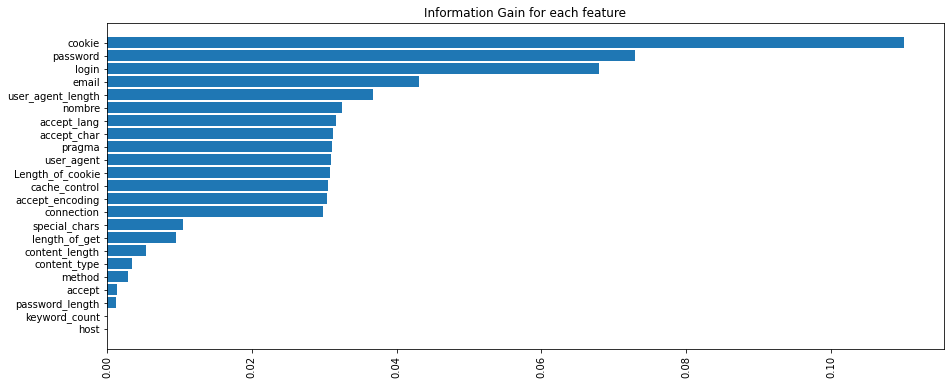

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# im_rting mut_ual in_fo from fea_ture sele_ction 
importance = mutual_info_classif(X, y)
#getting importance 
feature_importance_Ig = pd.Series(importance, index=X.columns)
#checking importance
fig,ax = matplt.subplots()

# plotting figure (15,6)
fig.set_size_inches(15,6)
# fixing fig_size of our graph 15,6 
ax.barh(feature_importance_Ig.sort_values().index, feature_importance_Ig.sort_values().values)
#Sorting the value and the fetaure importance that are taken from the FCMIM
matplt.xticks(rotation=90)
#rotating x axis label in 90 degree 

matplt.title('Information Gain for each feature')
#Matplotlib's.title function is used to plot a title on a graph.
matplt.show()
#showing a bar graph using the matplotlib's function

In [ ]:
t = pd.DataFrame(feature_importance_Ig.sort_values(), columns=['columns_name']).reset_index()#calling dataframe from oandas and converting feature importance in dataframe and sorting all values  and reseting index by function
#cr_ting data_frame of imp_ort_ance
p = t['index'].tolist()#converting in list by tolist function
# listing the index 
X = web_attack_data.drop(p[0:2], axis=1)#dropping columns
# dropping last two column
X.columns#visualizing columns data

Index(['Length_of_cookie', 'accept', 'accept_char', 'accept_encoding',
       'accept_lang', 'cache_control', 'connection', 'content_length',
       'content_type', 'cookie', 'email', 'length_of_get', 'login', 'method',
       'nombre', 'password', 'password_length', 'pragma', 'special_chars',
       'user_agent', 'user_agent_length', 'label'],
      dtype='object')

In [ ]:
Y = web_attack_data['label']
#from our dataset's intrusion data, the targeting label in y

In [ ]:
#scaling the data by standard scaler 
scaling_data = STNSCA()#calling for scaling  
X_scaled = pd.DataFrame(scaling_data.fit_transform(X),columns = X.columns)#making dataframe of scaling data and fitting standard scaler 
#making datarame of scaled data

In [ ]:
from sklearn.decomposition import PCA
# dimension reduction by importing PCA from Sklearn and splitting the dimension into two components
pca = PCA(n_components=2)#invoking PCA and passing arguments
#reducing the size of statistical data
principalComponents=pca.fit_transform(X_scaled)# passing scaling data 
#fitting tht PCA on scaled data

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# creating a PCA datarame and naming the columns 

In [ ]:
principalDf#showing pca dataframe

,principal component 1,principal component 2
0,-1.386704,0.264663
1,-1.040897,0.622195
2,-1.170203,0.538785
3,-1.171621,0.534152
4,-1.322866,0.337616
...,...,...
169060,4.464344,3.728869
169061,-1.170445,0.537995
169062,-1.382362,0.275083
169063,-1.358618,0.326293


In [ ]:
#Dataset is divided 70-30 into taining and tsting groups.
(trn_x, tst_x, trn_y, tst_y) = split_data(principalComponents, Y, test_size = 0.3) 
print(trn_x.shape, trn_y.shape)
print(tst_x.shape, tst_y.shape)

(118345, 2) (118345,)
(50720, 2) (50720,)


In [ ]:
import sklearn.metrics as metrics

In [ ]:
'''
After preprocessing and following these techniques such as
Data visualization
labelling
FCMIM
PCA
after following these steps;
we have define our dependent and independent variables.
then we have divided our data in two parts i.e training and testing.
and then used machine learning models like extratreeclassifier and xgboost with cross validation.
we have used extratree model with cross validaion and given hyperparameters with 10 cv.
and get the precision,recall,accuracy and f1 score for each this model.
we have used xgboost model with cross validaion and given hyperparameters with 10 cv as well.
and get the precision,recall,accuracy and f1 score for each this model.
after getting the training and testing accuracy.
we have also plot the confusion matrix and ROC curve for both models.
we have also mention the random state in our code.
after that we have done scaling.
and then applied the machine learning models.
first we have define the variable then fitted and predicted the models.
and we have used hyperparametrs in one of them i.e xgboost.

'''

'\nAfter preprocessing and following these techniques such as\nData visualization\nlabelling\nFCMIM\nPCA\nafter following these steps;\nwe have define our dependent and independent variables.\nthen we have divided our data in two parts i.e training and testing.\nand then used machine learning models like extratreeclassifier and xgboost with cross validation.\nwe have used extratree model with cross validaion and given hyperparameters with 10 cv.\nand get the precision,recall,accuracy and f1 score for each this model.\nwe have used xgboost model with cross validaion and given hyperparameters with 10 cv as well.\nand get the precision,recall,accuracy and f1 score for each this model.\nafter getting the training and testing accuracy.\nwe have also plot the confusion matrix and ROC curve for both models.\nwe have also mention the random state in our code.\nafter that we have done scaling.\nand then applied the machine learning models.\nfirst we have define the variable then fitted and pred

**ExtratreeClassifier(with cross validation)**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier()         
 
# Taining the model                                         
extra_tree_forest.fit(trn_x,trn_y)

##_predict t model
pred1 = extra_tree_forest.predict(tst_x)
print('accuracy=',metrics.accuracy_score(tst_y,pred1))

accuracy= 0.9730086750788643


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(extra_tree_forest,trn_x,trn_y,cv=5)
##_showed the mean
scores.mean()

0.9735603532046136

**Training accuracy and scores**

In [ ]:
##_showed training,f1,precision Score using cross_validation(5)
training_acc = cross_val_score(extra_tree_forest,trn_x,trn_y,cv=5)
f1_score = cross_val_score(extra_tree_forest,trn_x,trn_y, scoring='f1_macro',cv=5)
precision = cross_val_score(extra_tree_forest,trn_x,trn_y, scoring='precision_macro',cv=5)
Recall_score = cross_val_score(extra_tree_forest,trn_x,trn_y, scoring='recall_macro',cv=5)
########################################################################################################
##_print the acc..,precision and recall
print("Training accuracy : %0.2f" % (training_acc.mean()*100))
print('F1-Score : %0.2f' % (f1_score.mean()*100))
print('Precision : %0.2f' % (precision.mean()*100))
print('Recall score :%0.2f'%(Recall_score.mean()*100))

Training accuracy : 97.35
F1-Score : 94.57
Precision : 96.54
Recall score :92.86


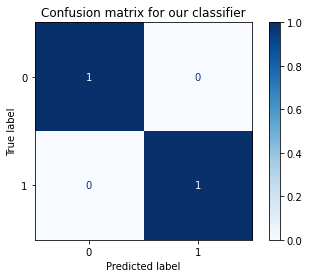

In [ ]:
####_plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

##_Confusion _matrix 
matrix = plot_confusion_matrix(extra_tree_forest, trn_x,trn_y,
                               cmap=matplt.cm.Blues,
                               normalize='true')
matplt.title('Confusion matrix for our classifier')
matplt.show(matrix)
matplt.show()


**Testing accuracy and scores**

In [ ]:
##_showed training,f1,precision Score using cross_validation(5)
testing_acc = cross_val_score(extra_tree_forest,tst_x,tst_y,cv=5)
f1_score = cross_val_score(extra_tree_forest,tst_x,tst_y, scoring='f1_macro',cv=5)
precision = cross_val_score(extra_tree_forest,tst_x,tst_y, scoring='precision_macro',cv=5)
Recall_score = cross_val_score(extra_tree_forest,tst_x,tst_y, scoring='recall_macro',cv=5)
########################################################################################################
##_print the acc..,precision and recall
print("Testing accuracy : %0.2f" % (training_acc.mean()*100))
print('F1-Score : %0.2f' % (f1_score.mean()*100))
print('Precision : %0.2f' % (precision.mean()*100))
print('Recall score :%0.2f'%(Recall_score.mean()*100))

Testing accuracy : 97.35
F1-Score : 94.17
Precision : 96.15
Recall score :92.35


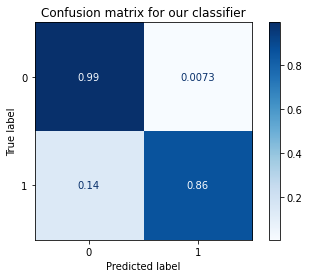

In [ ]:
####_plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

##_Confusion _matrix 
matrix = plot_confusion_matrix(extra_tree_forest, tst_x,tst_y,
                               cmap=matplt.cm.Blues,
                               normalize='true')
matplt.title('Confusion matrix for our classifier')
matplt.show(matrix)
matplt.show()


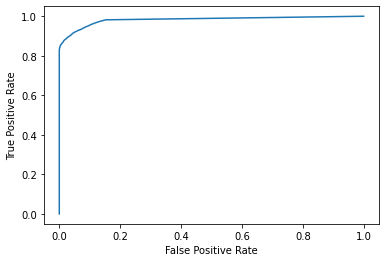

In [ ]:
##creating 'roc' curve nd predicting it
pred1_proba = extra_tree_forest.predict_proba(tst_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(tst_y,  pred1_proba)

#create ROC curve nd given labels 
matplt.plot(fpr,tpr)
matplt.ylabel('True Positive Rate')
matplt.xlabel('False Positive Rate')
matplt.show()

**Xgboost with cross validation**

In [ ]:
##-import xgboost classsifier
from xgboost import XGBClassifier
#f_i_t the _model on _the _tai_ning _da_ta
model2 = XGBClassifier(n_estimators=600)
model2.fit(trn_x,trn_y)
##_predict the model
pred2 = model2.predict(tst_x)
print('accuracy=',metrics.accuracy_score(tst_y,pred2))

accuracy= 0.9739353312302839


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,trn_x,trn_y,cv=10)
##_showed the mean
scores.mean()

0.974734879535875

**Training accuracy and scores**

In [ ]:
##_showed training,f1,precision Score using cross_validation(10)
training_acc = cross_val_score(model2,trn_x,trn_y,cv=10)
f1_score = cross_val_score(model2,trn_x,trn_y, scoring='f1_macro',cv=10)
precision = cross_val_score(model2,trn_x,trn_y, scoring='precision_macro',cv=10)
Recall_score = cross_val_score(model2,trn_x,trn_y, scoring='recall_macro',cv=10)
########################################################################################################
##_print the acc..,precision and recall
print("Training accuracy : %0.2f" % (training_acc.mean()*100))
print('F1-Score : %0.2f' % (f1_score.mean()*100))
print('Precision : %0.2f' % (precision.mean()*100))
print('Recall score :%0.2f'%(Recall_score.mean()*100))

Training accuracy : 97.47
F1-Score : 94.63
Precision : 98.37
Recall score :91.62


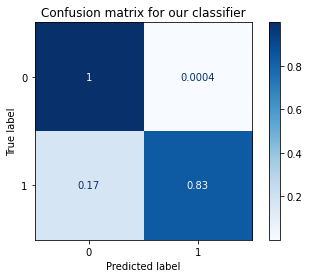

In [ ]:
####_plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

##_Confusion _matrix 
matrix = plot_confusion_matrix(model2, trn_x,trn_y,
                               cmap=matplt.cm.Blues,
                               normalize='true')
matplt.title('Confusion matrix for our classifier')
matplt.show(matrix)
matplt.show()


**Testing accuracy and scores**

In [ ]:
##_showed training,f1,precision Score using cross_validation(10)
testing_acc = cross_val_score(model2,tst_x,tst_y,cv=10)
f1_score = cross_val_score(model2,tst_x,tst_y, scoring='f1_macro',cv=10)
precision = cross_val_score(model2,tst_x,tst_y, scoring='precision_macro',cv=10)
Recall_score = cross_val_score(model2,tst_x,tst_y, scoring='recall_macro',cv=10)
########################################################################################################
##_print the acc..,precision and recall
print("Testing accuracy : %0.2f" % (training_acc.mean()*100))
print('F1-Score : %0.2f' % (f1_score.mean()*100))
print('Precision : %0.2f' % (precision.mean()*100))
print('Recall score :%0.2f'%(Recall_score.mean()*100))

Testing accuracy : 97.47
F1-Score : 94.41
Precision : 98.28
Recall score :91.34


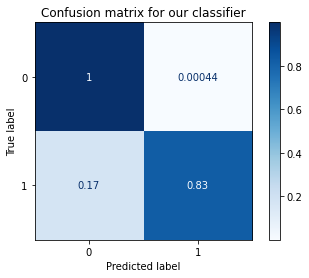

In [ ]:
####_plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

##_Confusion _matrix 
matrix = plot_confusion_matrix(model2, tst_x,tst_y,
                               cmap=matplt.cm.Blues,
                               normalize='true')
matplt.title('Confusion matrix for our classifier')
matplt.show(matrix)
matplt.show()


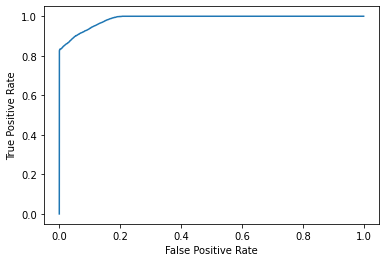

In [ ]:
##creating 'roc' curve nd predicting it
pred1_proba = model2.predict_proba(tst_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(tst_y,  pred1_proba)

#create ROC curve nd given labels 
matplt.plot(fpr,tpr)
matplt.ylabel('True Positive Rate')
matplt.xlabel('False Positive Rate')
matplt.show()

In [ ]:
'''
In Extra tree classifier we have predicted and fit the model nd given the hyperparameter which will help in improving our accuracy.
afterthat we have used cross validation with 10 cv
IN xgboost model we have predicted and fit the model nd given the hyperparameter which will help in improving our accuracy.
in which we have done the first step i.e fitting our model then predicted the model and also given the hyperparameters which helps in increasing the accuracy.
the models we have used in this code. we have find out the accuracy,precision ,recall for each model
then we showed the confusion matrix for each model, and thier graph as well.
Imported some important library like pandas,labelencoder,train_test_split,dt,dnn etc. 
we hve used the 'attack files' dataset which is publicly available
then we checked null values,shape and plot some graph like countplot and histogram.
then we have done labelling.but before labeling dropped some columns from the dataframe.
afterthat we used models xgboost and extratreeclassifier which has given the accuracy that is mentioned below.
Testing accuracy:-
                    Extra tree classifier = 0.97
                    Xgboost = 0.97
which is much better than the base models.
In xgboost model we have given the hyperparameter i.e n_estimator (600) which has a role to improve the accuracy.
we haven't used any hyperparameter in extra tree model.
IN xgboost we have used  ten cross validation.
but in extra tree model we have used five cross validaion.
after that we have also plot confusion matrix and ROC curve as well.
'''

"\nIn Extra tree classifier we have predicted and fit the model nd given the hyperparameter which will help in improving our accuracy.\nafterthat we have used cross validation with 10 cv\nIN xgboost model we have predicted and fit the model nd given the hyperparameter which will help in improving our accuracy.\nin which we have done the first step i.e fitting our model then predicted the model and also given the hyperparameters which helps in increasing the accuracy.\nthe models we have used in this code. we have find out the accuracy,precision ,recall for each model\nthen we showed the confusion matrix for each model, and thier graph as well.\nImported some important library like pandas,labelencoder,train_test_split,dt,dnn etc. \nwe hve used the 'attack files' dataset which is publicly available\nthen we checked null values,shape and plot some graph like countplot and histogram.\nthen we have done labelling.but before labeling dropped some columns from the dataframe.\nafterthat we use